## The Sparks Foundation - GRIP June'21

## Author : Ranjithnath K
### Task 2 : Predict the optimum number of clusters using Unsupervised ML and represent it visually.

#### Data : Iris Dataset - https://bit.ly/3kXTdox

### K Means Clustering

***K-means Clustering is a type of unsupervised ML algorithm which is simple and easy way to classify a given dataset to certain number of groups(clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.***

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Data

In [2]:
dataset=pd.read_csv('Iris.csv',index_col=0)

### Check out the Data

In [3]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.shape

(150, 5)

### Exploratory Data Analysis

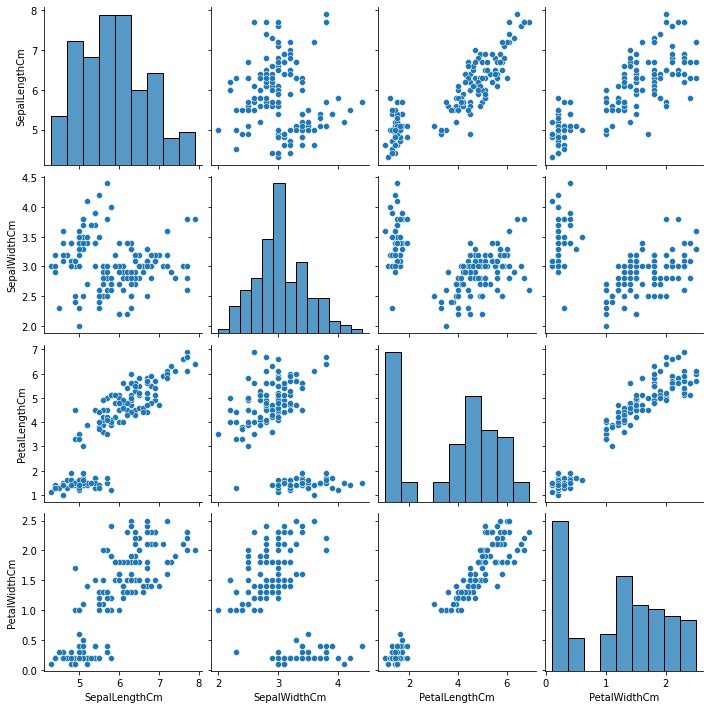

In [7]:
sns.pairplot(data=dataset)

<AxesSubplot:>

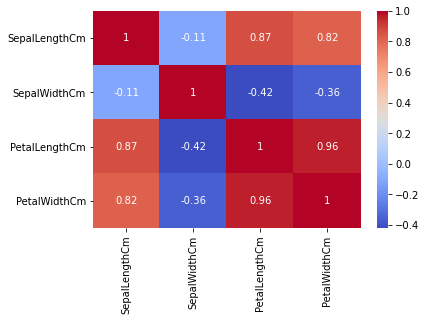

In [8]:
data_corr=dataset.corr()
sns.heatmap(data=data_corr,annot=True,cmap='coolwarm')

### Using the elbow method to find the optimal number of clusters

In [9]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
X=dataset.iloc[:,:-1].values

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

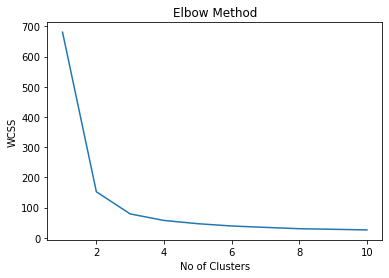

In [13]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

**With the help of Elbow method, we are choosing the number of clusters as 3**

### Training the K-Means model on the dataset

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualising the clusters

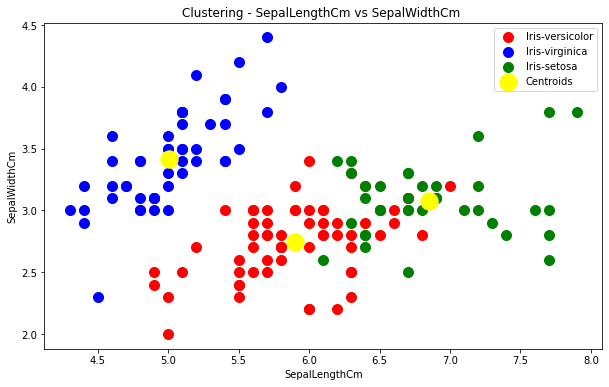

In [17]:
plt.figure(figsize=(10,6))
plt.title('Clustering - SepalLengthCm vs SepalWidthCm ')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-versicolor')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-virginica')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-setosa')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.legend()